1\. **PCA on 3D dataset**

* Generate a dataset simulating 3 features, each with N entries (N being ${\cal O}(1000)$). Each feature is made by random numbers generated according the normal distribution $N(\mu,\sigma)$ with mean $\mu_i$ and standard deviation $\sigma_i$, with $i=1, 2, 3$. Generate the 3 variables $x_{i}$ such that:
    * $x_1$ is distributed as $N(0,1)$
    * $x_2$ is distributed as $x_1+N(0,3)$
    * $x_3$ is given by $2x_1+x_2$
* Find the eigenvectors and eigenvalues using the eigendecomposition of the covariance matrix
* Find the eigenvectors and eigenvalues using the SVD. Check that the two procedures yield to same result
* What percent of the total dataset's variability is explained by the principal components? Given how the dataset was constructed, do these make sense? Reduce the dimensionality of the system so that at least 99% of the total variability is retained
* Redefine the data according to the new basis from the PCA
* Plot the data, in both the original and the new basis. The figure should have 2 rows (the original and the new basis) and 3 columns (the $[x_0, x_1]$, $[x_0, x_2]$ and $[x_1, x_2]$ projections) of scatter plots.

In [1]:
import numpy as np
import pandas as pd
from scipy import linalg as la
from matplotlib import pyplot as plt

np.random.seed(1234)


x1 = np.random.normal(0,1,1000)
x2 = x1 + np.random.normal(0,3,1000)
x3 = 2*x1 + x2

dataset = np.column_stack((x1,x2,x3))

cov_mat = np.cov(dataset.T)

# Eigenvalues and EigenVectors using Eigenvalue decomposition of the covariance matrix
l, V = la.eig(cov_mat)

print('\nDataset:', dataset.shape, '\nCovariance Matrix Size:',cov_mat.shape)
print('\nEigen Values:\n',np.real_if_close(l))
print('\nEigen Vector:\n',V)

# print("VV^T:\n", V.dot(V.T), '\n')
pd.DataFrame(dataset)
# dataset[:,0]


Dataset: (1000, 3) 
Covariance Matrix Size: (3, 3)

Eigen Values:
 [2.64557028e+01 5.52135127e-16 1.90192884e+00]

Eigen Vector:
 [[-0.11305445 -0.81649658  0.56617314]
 [-0.5803632  -0.40824829 -0.704636  ]
 [-0.8064721   0.40824829  0.42771029]]


,0,1,2
0,0.471435,-4.275189,-3.332319
1,-1.190976,-6.051546,-8.433498
2,1.432707,1.572393,4.437807
3,-0.312652,-5.352138,-5.977442
4,-0.720589,3.467088,2.025911
...,...,...,...
995,0.272164,2.169901,2.714229
996,0.931546,6.971691,8.834783
997,0.327532,2.671921,3.326986
998,0.740814,7.182269,8.663897


In [2]:
#covariance matrix by hand

mean_data = dataset.mean(axis=1)[:,np.newaxis]

mean_data = dataset - mean_data
print('\nmean_data:',mean_data.shape)
cov_by_hand = (mean_data.T).dot(mean_data)/(3-1)

print('\ncov_by_hand:',cov_by_hand.shape)


mean_data: (1000, 3)

cov_by_hand: (3, 3)


In [3]:
# Eigenvalues and EigenVectors using SVD
U, s, Vt = la.svd(dataset)
el_svd = (s ** 2)/(1000-1);
print(el_svd)

# By observing the value of the output we see the eigenvalues are the same though not in the same order.

[2.65053699e+01 1.90220668e+00 3.63666109e-31]


In [4]:
l = np.real_if_close(l) # only the real part of the eigenvector
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov_mat.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component x1, we retain %.2f%% of the total variability" % (Lambda[0, 0]/Lambda.trace()*100))
print("By selecting the component x2, we retain %.2f%% of the total variability" % (Lambda[1, 1]/Lambda.trace()*100))
print("By selecting the component x3, we retain %.2f%% of the total variability" % (Lambda[2, 2]/Lambda.trace()*100))

# Comment on Variability - 
# The first component represents 93.29 % of the total variability of the dataset.
# The second component represents 0 % of total variability of the dataset.
# The third component represents 6.71 % of total variability of the dataset.

# Given how our dataset was constructed this makes sense as the first components is the main principal component.
# The third component is a combination of the first and the second component, whereas the second is composed of only
# the first component.

# Thus selecting the first and third component will retain the maximum variability of the dataset as is evident from the calculation.

Lambda:
 [[2.64557028e+01 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 5.52135127e-16 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 1.90192884e+00]] 

Trace(A):
 28.35763165920515 

Trace(Lambda):
 28.357631659205158 

By selecting the component x1, we retain 93.29% of the total variability
By selecting the component x2, we retain 0.00% of the total variability
By selecting the component x3, we retain 6.71% of the total variability


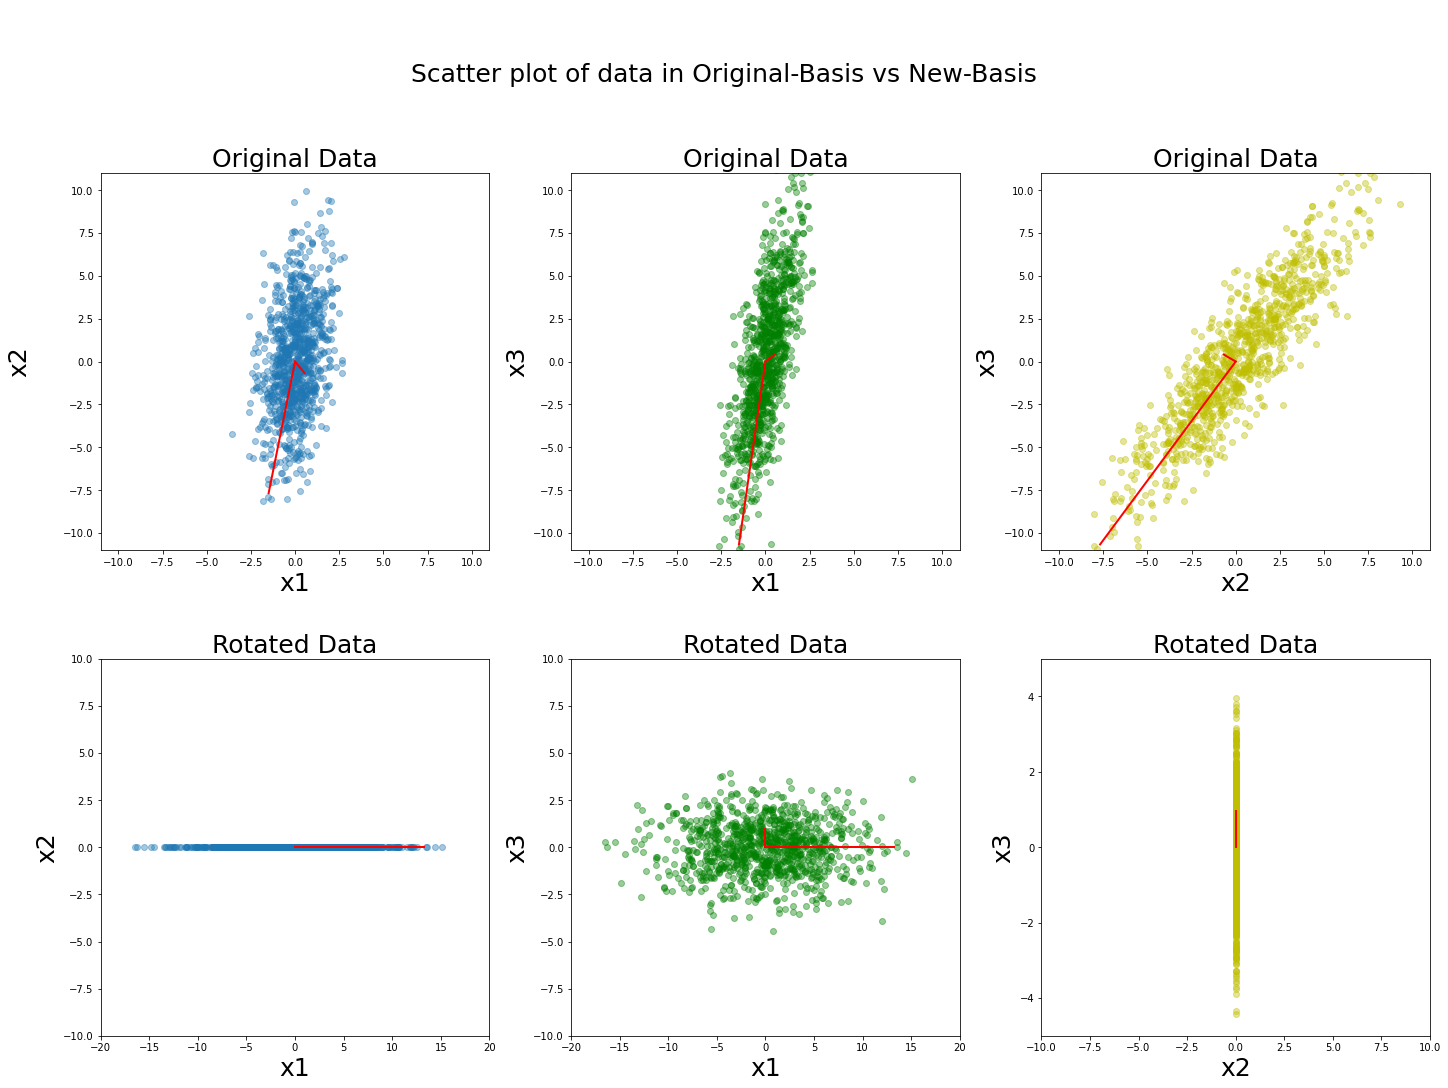

In [5]:
x1 = dataset[:,0]
x2 = dataset[:,1]
x3 = dataset[:,2]

eig_val = l #eigenvalues calculated using la.eig in cell 1
eig_vectors = V #eigenvectors

scale_factor = 0.5

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3, constrained_layout=True, figsize=(20,15))


ax1.scatter(x1,x2,alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax1.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[1]], 'r-', lw=2)
ax1.set_title('Original Data',fontsize = 25)
ax1.set_xlabel('x1\n', fontsize = 25)
ax1.set_ylabel('x2\n', fontsize = 25)
ax1.axis([-11,11,-11,11])

ax2.scatter(x1,x3, color = 'g',alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax2.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax2.set_title('Original Data',fontsize = 25)
ax2.set_xlabel('x1', fontsize = 25)
ax2.set_ylabel('x3', fontsize = 25)
ax2.axis([-11,11,-11,11])

ax3.scatter(x2,x3, color = 'y',alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax3.plot([0, scale_factor*val*vector[1]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax3.set_title('Original Data',fontsize = 25)
ax3.set_xlabel('x2', fontsize = 25)
ax3.set_ylabel('x3', fontsize = 25)
ax3.axis([-11,11,-11,11])


# Data rotation using the eigen_vectors
new_data = np.dot(eig_vectors.T,dataset.T)
new_data = new_data.T


ax4.scatter(new_data[:,0],new_data[:,1],alpha = 0.4) 
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax4.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[1]], 'r-', lw=2)
ax4.set_title('Rotated Data',fontsize = 25)
ax4.set_xlabel('x1', fontsize = 25)
ax4.set_ylabel('x2', fontsize = 25)
ax4.axis([-20,20,-10,10])

ax5.scatter(new_data[:,0],new_data[:,2],alpha = 0.4, color = 'g') 
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax5.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax5.set_title('Rotated Data',fontsize = 25)
ax5.set_xlabel('x1', fontsize = 25)
ax5.set_ylabel('x3', fontsize = 25)
ax5.axis([-20,20,-10,10])

ax6.scatter(new_data[:,1],new_data[:,2],alpha = 0.4, color = 'y') 
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax6.plot([0, scale_factor*val*vector[1]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax6.set_title('Rotated Data',fontsize = 25)
ax6.set_xlabel('x2', fontsize = 25)
ax6.set_ylabel('x3', fontsize = 25)
ax6.axis([-10,10,-5,5])

fig.suptitle('\n\nScatter plot of data in Original-Basis vs New-Basis\n\n', fontsize = 25)
plt.show()

2\. **PCA on a nD dataset**

* Start from the dataset you have genereted in the previous exercise and add uncorrelated random noise. Such noise should be represented by other 10 uncorrelated variables normally distributed, with a standard deviation much smaller (e.g. a factor 20) than those used to generate the $x_1$ and $x_2$. Repeat the PCA procedure and compare the results with what you have obtained before.

In [6]:
#generate 10 uncorrelated variables, by variables here I understand features because nD means n features

noise_variables = [np.random.normal(0,1/(20+i), 1000) for i in range(0,10)]

nd_dataset = np.append(dataset,np.array(noise_variables).T, axis = 1) # 3D dataset to nD dataset 
pd.DataFrame(nd_dataset) 

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.471435,-4.275189,-3.332319,-0.059352,-0.007562,-0.036904,0.059900,0.062807,-0.047022,-0.058517,-0.051396,0.026470,-0.042498
1,-1.190976,-6.051546,-8.433498,0.080854,-0.002764,-0.087247,0.000819,-0.069780,-0.001487,-0.012563,0.050054,0.011669,-0.079996
2,1.432707,1.572393,4.437807,-0.002134,-0.044203,-0.035806,-0.034818,-0.043966,-0.003722,0.085856,-0.002258,0.023794,0.002295
3,-0.312652,-5.352138,-5.977442,0.018399,0.043444,0.116350,0.057217,-0.040126,-0.022987,0.065682,-0.056332,0.002270,0.046905
4,-0.720589,3.467088,2.025911,0.090459,0.025636,-0.000206,0.059949,0.055266,0.015965,0.014529,0.057078,-0.006588,-0.004519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.272164,2.169901,2.714229,0.035152,0.013493,-0.026949,-0.057725,0.006089,-0.057536,0.032401,-0.038818,-0.031855,0.010417
996,0.931546,6.971691,8.834783,-0.054663,-0.005757,0.032224,-0.008582,-0.066510,-0.103548,0.010640,-0.028844,0.011909,0.005240
997,0.327532,2.671921,3.326986,0.009324,0.033476,0.073128,0.021473,-0.001849,-0.055878,-0.005818,-0.038980,-0.015151,-0.060629
998,0.740814,7.182269,8.663897,0.133993,-0.015171,0.090695,0.009332,-0.049919,0.029362,0.013911,-0.018433,0.029112,-0.028677


In [7]:
ndcov_mat = np.cov(nd_dataset.T)

# Eigenvalues and EigenVectors using Eigenvalue decomposition of the covariance matrix
nl, nV = la.eig(ndcov_mat)

print('\nDataset:', nd_dataset.shape, '\nCovariance Matrix Size:',ndcov_mat.shape)
print('\nEigen Values:\n',np.real_if_close(nl))
print('\nEigen Vector:\n',nV)


Dataset: (1000, 13) 
Covariance Matrix Size: (13, 13)

Eigen Values:
 [ 2.64557251e+01  1.90194148e+00 -7.30191964e-16  2.46032431e-03
  2.23918973e-03  2.15886890e-03  1.89512263e-03  1.16222270e-03
  1.24024268e-03  1.34576537e-03  1.49194607e-03  1.67210594e-03
  1.61018320e-03]

Eigen Vector:
 [[ 1.13054370e-01 -5.66171343e-01 -8.16496581e-01 -1.45186496e-04
  -5.31928488e-04  2.95775273e-04 -5.44505512e-04  3.74451312e-04
  -5.18403287e-04 -7.08889935e-04 -1.84196445e-04 -5.89158102e-04
  -2.69375759e-04]
 [ 5.80362996e-01  7.04633216e-01 -4.08248290e-01  6.22707721e-04
   5.07264691e-04 -5.44474998e-04  6.92880785e-04 -4.73896528e-04
   6.50119763e-04  1.23699843e-03  3.25625610e-04  6.61373547e-04
   1.18724052e-04]
 [ 8.06471735e-01 -4.27709470e-01  4.08248290e-01  3.32334729e-04
  -5.56592285e-04  4.70755490e-05 -3.96130239e-04  2.75006097e-04
  -3.86686810e-04 -1.80781442e-04 -4.27672803e-05 -5.16942658e-04
  -4.20027466e-04]
 [ 6.21015394e-04  8.71461535e-05 -9.08859372e-16

In [8]:
nl = np.real_if_close(nl) # only the real part of the eigenvector
Lambda = np.diag(nl)
print("Trace(A):\n", ndcov_mat.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

for i in range(0, len(nl)):
    print("By selecting the component x%i, we retain %.2f%% of the total variability" %  ((i+1),abs(Lambda[i, i]/Lambda.trace()*100)))

Trace(A):
 28.374942549262208 

Trace(Lambda):
 28.3749425492622 

By selecting the component x1, we retain 93.24% of the total variability
By selecting the component x2, we retain 6.70% of the total variability
By selecting the component x3, we retain 0.00% of the total variability
By selecting the component x4, we retain 0.01% of the total variability
By selecting the component x5, we retain 0.01% of the total variability
By selecting the component x6, we retain 0.01% of the total variability
By selecting the component x7, we retain 0.01% of the total variability
By selecting the component x8, we retain 0.00% of the total variability
By selecting the component x9, we retain 0.00% of the total variability
By selecting the component x10, we retain 0.00% of the total variability
By selecting the component x11, we retain 0.01% of the total variability
By selecting the component x12, we retain 0.01% of the total variability
By selecting the component x13, we retain 0.01% of the total vari

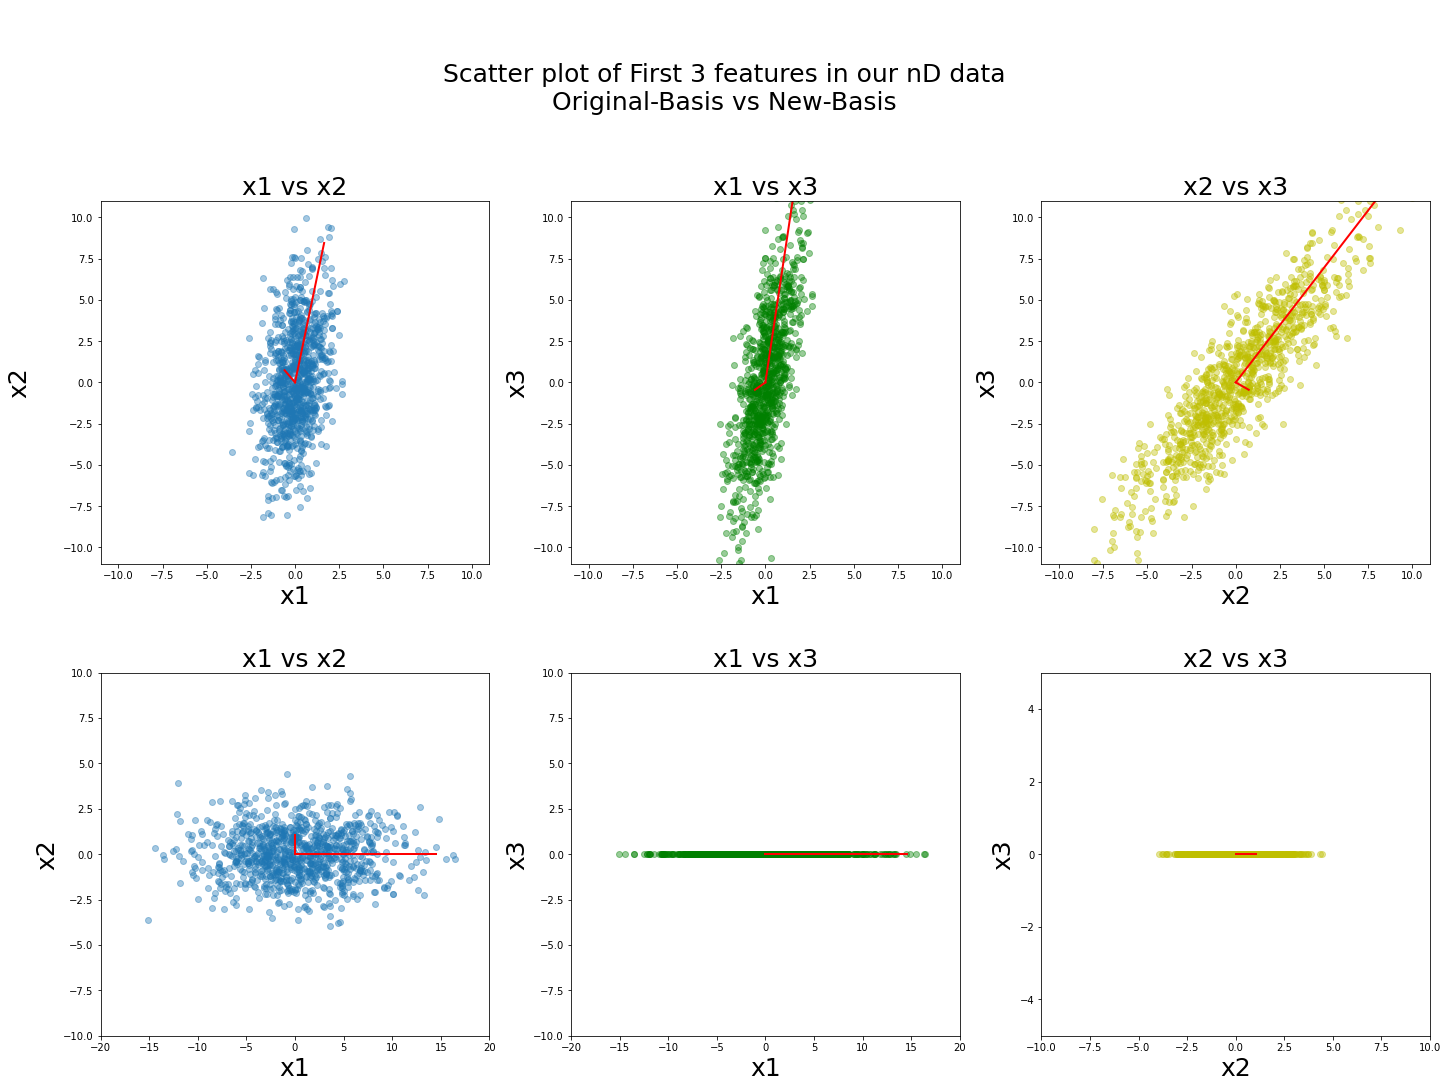

In [9]:
x1 = nd_dataset[:,0]
x2 = nd_dataset[:,1]
x3 = nd_dataset[:,2]

eig_val = nl #eigenvalues calculated using la.eig in cell 1
eig_vectors = nV #eigenvectors

scale_factor = 0.55

fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(nrows = 2, ncols = 3, constrained_layout=True, figsize=(20,15))


ax1.scatter(x1,x2,alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax1.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[1]], 'r-', lw=2)
ax1.set_title('x1 vs x2',fontsize = 25)
ax1.set_xlabel('x1\n', fontsize = 25)
ax1.set_ylabel('x2\n', fontsize = 25)
ax1.axis([-11,11,-11,11])

ax2.scatter(x1,x3, color = 'g',alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax2.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax2.set_title('x1 vs x3',fontsize = 25)
ax2.set_xlabel('x1', fontsize = 25)
ax2.set_ylabel('x3', fontsize = 25)
ax2.axis([-11,11,-11,11])

ax3.scatter(x2,x3, color = 'y',alpha = 0.4)
for val, vector in zip(eig_val, eig_vectors.T):
    ax3.plot([0, scale_factor*val*vector[1]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax3.set_title('x2 vs x3',fontsize = 25)
ax3.set_xlabel('x2\n', fontsize = 25)
ax3.set_ylabel('x3', fontsize = 25)
ax3.axis([-11,11,-11,11])


# Data rotation using the eigen_vectors
new_data = np.dot(eig_vectors.T,nd_dataset.T)
new_data = new_data.T


ax4.scatter(new_data[:,0],new_data[:,1],alpha = 0.4) 
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax4.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[1]], 'r-', lw=2)
ax4.set_title('x1 vs x2',fontsize = 25)
ax4.set_xlabel('x1', fontsize = 25)
ax4.set_ylabel('x2', fontsize = 25)
ax4.axis([-20,20,-10,10])

ax5.scatter(new_data[:,0],new_data[:,2],alpha = 0.4, color = 'g') 
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax5.plot([0, scale_factor*val*vector[0]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax5.set_title('x1 vs x3',fontsize = 25)
ax5.set_xlabel('x1', fontsize = 25)
ax5.set_ylabel('x3', fontsize = 25)
ax5.axis([-20,20,-10,10])

ax6.scatter(new_data[:,1],new_data[:,2],alpha = 0.4, color = 'y') 
for val, vector in zip(eig_val, np.dot(eig_vectors.T, eig_vectors)):
    ax6.plot([0, scale_factor*val*vector[1]], [0, scale_factor*val*vector[2]], 'r-', lw=2)
ax6.set_title('x2 vs x3',fontsize = 25)
ax6.set_xlabel('x2', fontsize = 25)
ax6.set_ylabel('x3', fontsize = 25)
ax6.axis([-10,10,-5,5])

fig.suptitle('\n\nScatter plot of First 3 features in our nD data\nOriginal-Basis vs New-Basis\n\n', fontsize = 25)
plt.show()

3\. **Optional**: **PCA on the MAGIC dataset**

Perform a PCA on the magic04.data dataset.

In [10]:
# get the dataset and its description on the proper data directory
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.data -P data/
# !wget https://archive.ics.uci.edu/ml/machine-learning-databases/magic/magic04.names -P data/ 

In [11]:
columns=['fLength','fWidth','fSize','fConc','fConc1','fAsym','fM3Long','fM3Trans','fAlpha','fDist','class']
data = pd.read_csv('data/magic04.data')
data.columns = columns
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980,g
...,...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258,h
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560,h
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166,h
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166,h


In [12]:
del data['class']
data

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
1,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
2,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
3,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620
4,51.6240,21.1502,2.9085,0.2420,0.1340,50.8761,43.1887,9.8145,3.6130,238.0980
...,...,...,...,...,...,...,...,...,...,...
19014,21.3846,10.9170,2.6161,0.5857,0.3934,15.2618,11.5245,2.8766,2.4229,106.8258
19015,28.9452,6.7020,2.2672,0.5351,0.2784,37.0816,13.1853,-2.9632,86.7975,247.4560
19016,75.4455,47.5305,3.4483,0.1417,0.0549,-9.3561,41.0562,-9.4662,30.2987,256.5166
19017,120.5135,76.9018,3.9939,0.0944,0.0683,5.8043,-93.5224,-63.8389,84.6874,408.3166


In [13]:
cov_mat = np.cov(data.T)
l, V = la.eig(cov_mat)

print('\nDataset:', data.shape, '\nCovariance Matrix Size:',cov_mat.shape)
print('\nEigen Values:\n',np.real_if_close(l))
print('\nEigen Vector:\n',V)


Dataset: (19019, 10) 
Covariance Matrix Size: (10, 10)

Eigen Values:
 [6.57940709e+03 3.85406143e+03 2.01648128e+03 1.32681867e+03
 6.10218593e+02 4.33618554e+02 1.17335954e+02 8.64007193e-02
 1.07368268e-02 3.85330787e-04]

Eigen Vector:
 [[ 3.27831566e-01  1.34391257e-01 -6.54919335e-02 -8.63984924e-01
  -9.45486785e-02 -1.98590747e-02  3.38166047e-01  3.99908190e-03
  -4.54855335e-04  4.57009104e-05]
 [ 1.13818908e-01  5.38781071e-02  1.90004002e-02 -3.19763260e-01
   1.97550122e-02  2.32607173e-02 -9.38308008e-01  1.33846960e-02
   6.74914234e-04 -5.73082482e-05]
 [ 3.06095229e-03 -6.59527755e-04 -1.05914677e-03 -6.93020544e-03
  -2.65186570e-03  1.33537798e-04 -1.08822564e-02 -9.27766268e-01
  -3.72227209e-01  2.26325035e-02]
 [-9.27207133e-04  2.58262608e-04  5.10330302e-04  2.60551065e-03
   1.53901245e-03 -3.47117394e-05  3.06281191e-03  3.22018741e-01
  -7.69225390e-01  5.51884502e-01]
 [-5.21959171e-04  1.52747029e-04  2.94589142e-04  1.51272408e-03
   9.19355464e-04 -2.221

In [14]:
l = np.real_if_close(l) # only the real part of the eigenvector
Lambda = np.diag(l)
print("Trace(A):\n", cov_mat.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

for i in range(0, len(l)):
    print("By selecting the component x%i, we retain %.2f%% of the total variability" %  ((i+1),abs(Lambda[i, i]/Lambda.trace()*100)))

Trace(A):
 14938.039097757795 

Trace(Lambda):
 14938.039097757792 

By selecting the component x1, we retain 44.04% of the total variability
By selecting the component x2, we retain 25.80% of the total variability
By selecting the component x3, we retain 13.50% of the total variability
By selecting the component x4, we retain 8.88% of the total variability
By selecting the component x5, we retain 4.08% of the total variability
By selecting the component x6, we retain 2.90% of the total variability
By selecting the component x7, we retain 0.79% of the total variability
By selecting the component x8, we retain 0.00% of the total variability
By selecting the component x9, we retain 0.00% of the total variability
By selecting the component x10, we retain 0.00% of the total variability


In [15]:
sum_var = 0
for i in range(0, 6):
    sum_var += abs(Lambda[i, i]/Lambda.trace()*100)

print('The first 6 features represent %f%% of the variability of the dataset',sum_var)

The first 6 features represent %f%% of the variability of the dataset 99.21386283387905


In [19]:
import seaborn as sns

data_new = pd.DataFrame(np.dot(V.T, data.T).T, columns=data.columns)

# Dropping the last 4 columns as they don't contribute to the variability as seen before
data_new.drop(columns=['fM3Long','fM3Trans','fAlpha','fDist'], inplace=True)

# Dropping the last 4 columns in the original data for visual comparison in plots
data_orig = data.drop(columns=['fM3Long','fM3Trans','fAlpha','fDist'])
data_new.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym
0,174.584036,-109.897345,33.990587,7.504008,27.851736,-11.068800
1,243.437570,-111.288711,162.330205,-158.003704,84.033056,-48.767946
2,97.931136,-58.006821,42.246046,-4.308835,20.074110,-8.226268
3,331.894267,-145.569115,40.850410,7.847066,39.157183,20.134795
4,199.670989,-148.390822,37.029010,-13.543814,29.244980,8.412757


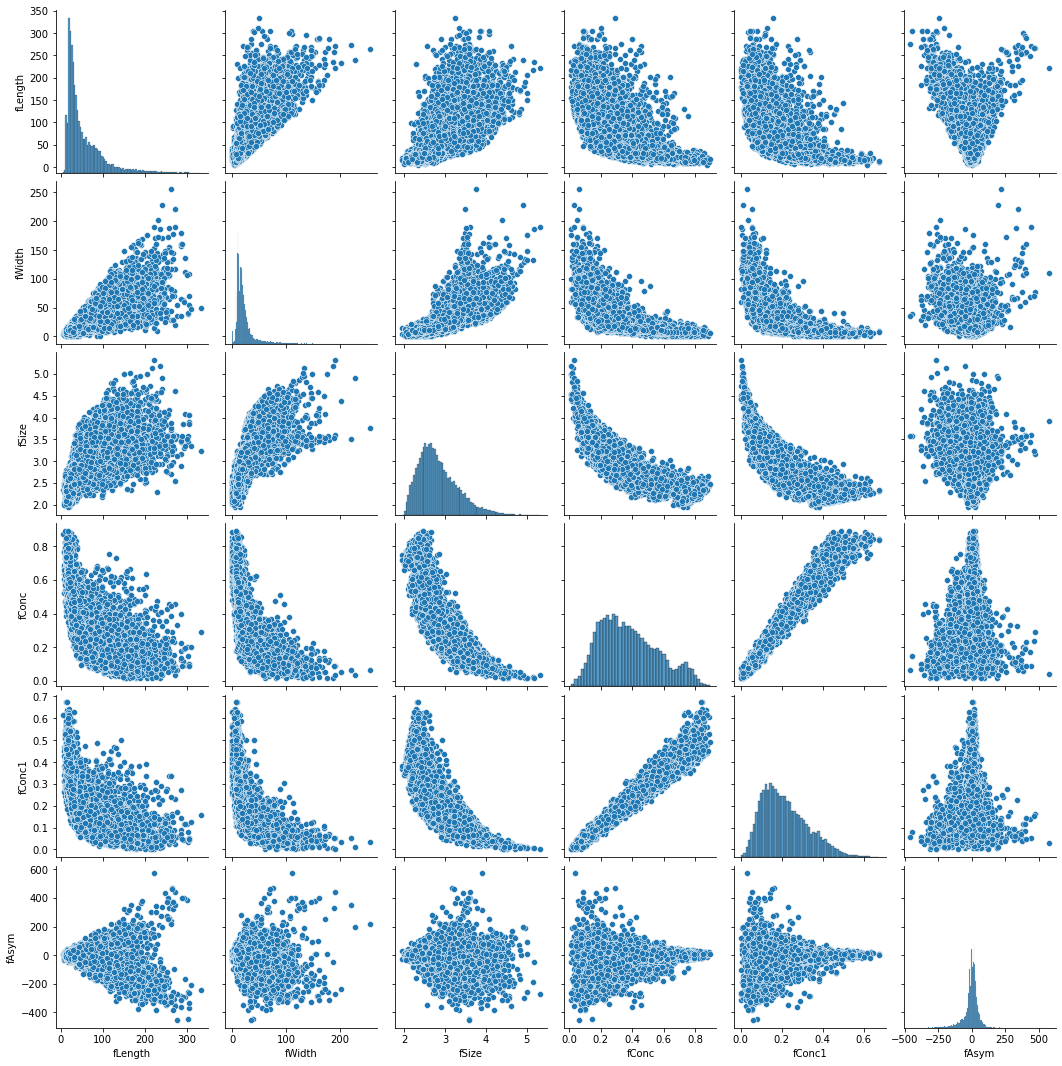

In [20]:
g = sns.pairplot(data_orig)

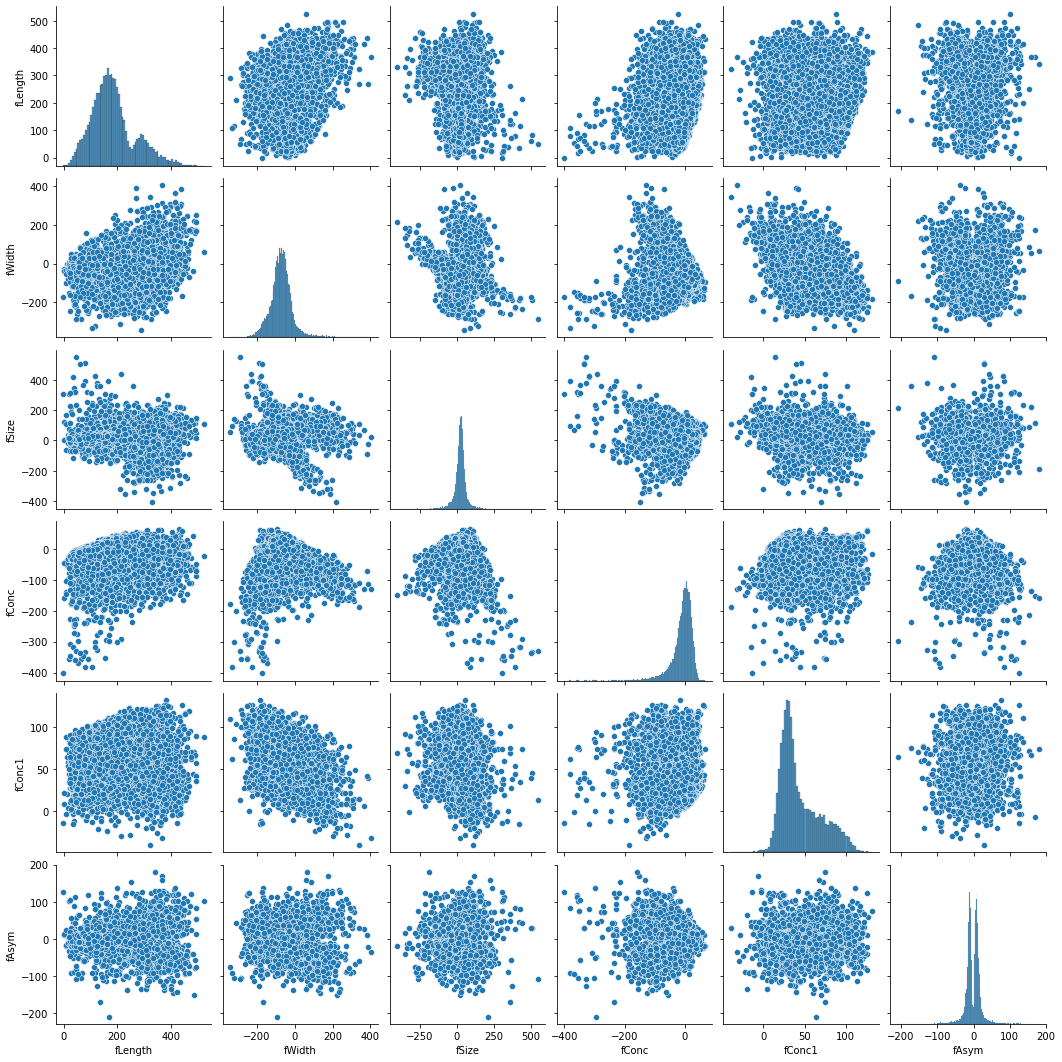

In [21]:
g = sns.pairplot(data_new)